# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

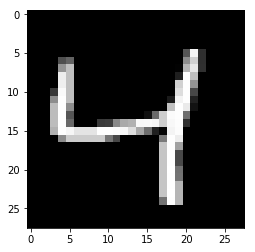

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

In [4]:
moo_img = img.reshape([28,28])
print(moo_img[10:15, 10:15])

[[ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.19215688  0.45490199  0.56470591  0.58823532  0.9450981 ]]


We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [5]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

input_dim = 28 * 28

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, [None, input_dim], name='inputs')
targets_ = tf.placeholder(tf.float32, [None, input_dim], name='targets')

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs=inputs_, units=encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(inputs=encoded, units=input_dim, activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name='output')

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
learning_rate = 0.001
opt = tf.train.AdamOptimizer(learning_rate).minimize(cost)

## Training

In [6]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [7]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6934
Epoch: 1/20... Training loss: 0.6900
Epoch: 1/20... Training loss: 0.6863
Epoch: 1/20... Training loss: 0.6822
Epoch: 1/20... Training loss: 0.6770
Epoch: 1/20... Training loss: 0.6702
Epoch: 1/20... Training loss: 0.6632
Epoch: 1/20... Training loss: 0.6551
Epoch: 1/20... Training loss: 0.6449
Epoch: 1/20... Training loss: 0.6315
Epoch: 1/20... Training loss: 0.6199
Epoch: 1/20... Training loss: 0.6085
Epoch: 1/20... Training loss: 0.5924
Epoch: 1/20... Training loss: 0.5773
Epoch: 1/20... Training loss: 0.5594
Epoch: 1/20... Training loss: 0.5430
Epoch: 1/20... Training loss: 0.5260
Epoch: 1/20... Training loss: 0.5058
Epoch: 1/20... Training loss: 0.4901
Epoch: 1/20... Training loss: 0.4730
Epoch: 1/20... Training loss: 0.4507
Epoch: 1/20... Training loss: 0.4405
Epoch: 1/20... Training loss: 0.4241
Epoch: 1/20... Training loss: 0.4080
Epoch: 1/20... Training loss: 0.3996
Epoch: 1/20... Training loss: 0.3807
Epoch: 1/20... Training loss: 0.3766
E

Epoch: 1/20... Training loss: 0.1929
Epoch: 1/20... Training loss: 0.1848
Epoch: 1/20... Training loss: 0.1815
Epoch: 1/20... Training loss: 0.1907
Epoch: 1/20... Training loss: 0.1897
Epoch: 1/20... Training loss: 0.1866
Epoch: 1/20... Training loss: 0.1835
Epoch: 1/20... Training loss: 0.1834
Epoch: 1/20... Training loss: 0.1829
Epoch: 1/20... Training loss: 0.1848
Epoch: 1/20... Training loss: 0.1925
Epoch: 1/20... Training loss: 0.1877
Epoch: 1/20... Training loss: 0.1831
Epoch: 1/20... Training loss: 0.1839
Epoch: 1/20... Training loss: 0.1880
Epoch: 1/20... Training loss: 0.1886
Epoch: 1/20... Training loss: 0.1852
Epoch: 1/20... Training loss: 0.1865
Epoch: 1/20... Training loss: 0.1871
Epoch: 1/20... Training loss: 0.1903
Epoch: 1/20... Training loss: 0.1800
Epoch: 1/20... Training loss: 0.1822
Epoch: 1/20... Training loss: 0.1846
Epoch: 1/20... Training loss: 0.1803
Epoch: 1/20... Training loss: 0.1835
Epoch: 1/20... Training loss: 0.1818
Epoch: 1/20... Training loss: 0.1866
E

Epoch: 2/20... Training loss: 0.1467
Epoch: 2/20... Training loss: 0.1476
Epoch: 2/20... Training loss: 0.1471
Epoch: 2/20... Training loss: 0.1447
Epoch: 2/20... Training loss: 0.1466
Epoch: 2/20... Training loss: 0.1539
Epoch: 2/20... Training loss: 0.1502
Epoch: 2/20... Training loss: 0.1403
Epoch: 2/20... Training loss: 0.1474
Epoch: 2/20... Training loss: 0.1507
Epoch: 2/20... Training loss: 0.1468
Epoch: 2/20... Training loss: 0.1469
Epoch: 2/20... Training loss: 0.1444
Epoch: 2/20... Training loss: 0.1447
Epoch: 2/20... Training loss: 0.1500
Epoch: 2/20... Training loss: 0.1511
Epoch: 2/20... Training loss: 0.1460
Epoch: 2/20... Training loss: 0.1424
Epoch: 2/20... Training loss: 0.1451
Epoch: 2/20... Training loss: 0.1418
Epoch: 2/20... Training loss: 0.1427
Epoch: 2/20... Training loss: 0.1450
Epoch: 2/20... Training loss: 0.1536
Epoch: 2/20... Training loss: 0.1478
Epoch: 2/20... Training loss: 0.1468
Epoch: 2/20... Training loss: 0.1477
Epoch: 2/20... Training loss: 0.1478
E

Epoch: 3/20... Training loss: 0.1311
Epoch: 3/20... Training loss: 0.1290
Epoch: 3/20... Training loss: 0.1305
Epoch: 3/20... Training loss: 0.1308
Epoch: 3/20... Training loss: 0.1263
Epoch: 3/20... Training loss: 0.1263
Epoch: 3/20... Training loss: 0.1259
Epoch: 3/20... Training loss: 0.1291
Epoch: 3/20... Training loss: 0.1250
Epoch: 3/20... Training loss: 0.1306
Epoch: 3/20... Training loss: 0.1352
Epoch: 3/20... Training loss: 0.1280
Epoch: 3/20... Training loss: 0.1313
Epoch: 3/20... Training loss: 0.1266
Epoch: 3/20... Training loss: 0.1277
Epoch: 3/20... Training loss: 0.1287
Epoch: 3/20... Training loss: 0.1299
Epoch: 3/20... Training loss: 0.1295
Epoch: 3/20... Training loss: 0.1271
Epoch: 3/20... Training loss: 0.1245
Epoch: 3/20... Training loss: 0.1243
Epoch: 3/20... Training loss: 0.1275
Epoch: 3/20... Training loss: 0.1264
Epoch: 3/20... Training loss: 0.1293
Epoch: 3/20... Training loss: 0.1233
Epoch: 3/20... Training loss: 0.1286
Epoch: 3/20... Training loss: 0.1254
E

Epoch: 4/20... Training loss: 0.1186
Epoch: 4/20... Training loss: 0.1149
Epoch: 4/20... Training loss: 0.1169
Epoch: 4/20... Training loss: 0.1142
Epoch: 4/20... Training loss: 0.1182
Epoch: 4/20... Training loss: 0.1150
Epoch: 4/20... Training loss: 0.1167
Epoch: 4/20... Training loss: 0.1137
Epoch: 4/20... Training loss: 0.1180
Epoch: 4/20... Training loss: 0.1181
Epoch: 4/20... Training loss: 0.1108
Epoch: 4/20... Training loss: 0.1210
Epoch: 4/20... Training loss: 0.1142
Epoch: 4/20... Training loss: 0.1166
Epoch: 4/20... Training loss: 0.1183
Epoch: 4/20... Training loss: 0.1162
Epoch: 4/20... Training loss: 0.1208
Epoch: 4/20... Training loss: 0.1131
Epoch: 4/20... Training loss: 0.1180
Epoch: 4/20... Training loss: 0.1152
Epoch: 4/20... Training loss: 0.1160
Epoch: 4/20... Training loss: 0.1182
Epoch: 4/20... Training loss: 0.1152
Epoch: 4/20... Training loss: 0.1182
Epoch: 4/20... Training loss: 0.1204
Epoch: 4/20... Training loss: 0.1167
Epoch: 4/20... Training loss: 0.1179
E

Epoch: 5/20... Training loss: 0.1101
Epoch: 5/20... Training loss: 0.1103
Epoch: 5/20... Training loss: 0.1105
Epoch: 5/20... Training loss: 0.1105
Epoch: 5/20... Training loss: 0.1078
Epoch: 5/20... Training loss: 0.1081
Epoch: 5/20... Training loss: 0.1127
Epoch: 5/20... Training loss: 0.1103
Epoch: 5/20... Training loss: 0.1070
Epoch: 5/20... Training loss: 0.1096
Epoch: 5/20... Training loss: 0.1053
Epoch: 5/20... Training loss: 0.1068
Epoch: 5/20... Training loss: 0.1066
Epoch: 5/20... Training loss: 0.1052
Epoch: 5/20... Training loss: 0.1099
Epoch: 5/20... Training loss: 0.1118
Epoch: 5/20... Training loss: 0.1056
Epoch: 5/20... Training loss: 0.1023
Epoch: 5/20... Training loss: 0.1087
Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1121
Epoch: 5/20... Training loss: 0.1106
Epoch: 5/20... Training loss: 0.1057
Epoch: 5/20... Training loss: 0.1061
Epoch: 5/20... Training loss: 0.1073
Epoch: 5/20... Training loss: 0.1051
Epoch: 5/20... Training loss: 0.1087
E

Epoch: 6/20... Training loss: 0.1009
Epoch: 6/20... Training loss: 0.1050
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1032
Epoch: 6/20... Training loss: 0.1030
Epoch: 6/20... Training loss: 0.1040
Epoch: 6/20... Training loss: 0.1017
Epoch: 6/20... Training loss: 0.1024
Epoch: 6/20... Training loss: 0.1019
Epoch: 6/20... Training loss: 0.1027
Epoch: 6/20... Training loss: 0.1003
Epoch: 6/20... Training loss: 0.1047
Epoch: 6/20... Training loss: 0.1018
Epoch: 6/20... Training loss: 0.0992
Epoch: 6/20... Training loss: 0.1052
Epoch: 6/20... Training loss: 0.1018
Epoch: 6/20... Training loss: 0.1023
Epoch: 6/20... Training loss: 0.1000
Epoch: 6/20... Training loss: 0.1016
Epoch: 6/20... Training loss: 0.1048
Epoch: 6/20... Training loss: 0.1028
Epoch: 6/20... Training loss: 0.1029
Epoch: 6/20... Training loss: 0.1062
Epoch: 6/20... Training loss: 0.1011
Epoch: 6/20... Training loss: 0.1040
Epoch: 6/20... Training loss: 0.1054
Epoch: 6/20... Training loss: 0.0996
E

Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.0987
Epoch: 7/20... Training loss: 0.0993
Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.1049
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.0949
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.0977
Epoch: 7/20... Training loss: 0.0980
Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.0988
Epoch: 7/20... Training loss: 0.0979
Epoch: 7/20... Training loss: 0.0970
Epoch: 7/20... Training loss: 0.0993
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.1038
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.0976
Epoch: 7/20... Training loss: 0.0988
Epoch: 7/20... Training loss: 0.1023
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.1006
E

Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.0926
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.0928
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.0951
Epoch: 8/20... Training loss: 0.0995
Epoch: 8/20... Training loss: 0.1030
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0953
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.0915
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.0944
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0955
Epoch: 8/20... Training loss: 0.0999
Epoch: 8/20... Training loss: 0.0986
E

Epoch: 9/20... Training loss: 0.0924
Epoch: 9/20... Training loss: 0.0944
Epoch: 9/20... Training loss: 0.0948
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0933
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0986
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.0949
Epoch: 9/20... Training loss: 0.0948
Epoch: 9/20... Training loss: 0.0943
Epoch: 9/20... Training loss: 0.0946
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0987
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0942
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.0979
Epoch: 9/20... Training loss: 0.0937
Epoch: 9/20... Training loss: 0.0925
Epoch: 9/20... Training loss: 0.0928
Epoch: 9/20... Training loss: 0.0939
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0957
E

Epoch: 10/20... Training loss: 0.0982
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0914
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0932
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0981
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0919
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0979
Epoch: 11/20... Training loss: 0.0931
Epoch: 11/20... Training loss: 0.0915
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0909
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0984
Epoch: 11/20... Training loss: 0.0965
Epoch: 11/20... Training loss: 0.0913
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0996
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0970
Epoch: 11/20... Training loss: 0.0968
Epoch: 11/20... Training loss: 0.0976
Epoch: 11/20... Training loss: 0.0972
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0932
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0924
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0969
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0908
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0998
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0924
Epoch: 12/20... Training loss: 0.0916
Epoch: 12/20... Training loss: 0.0968
Epoch: 12/20... Training loss: 0.0911
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0925
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0920
Epoch: 13/20... Training loss: 0.0974
Epoch: 13/20... Training loss: 0.0970
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0892
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0925
Epoch: 13/20... Training loss: 0.0903
Epoch: 13/20... Training loss: 0.0960
Epoch: 13/20... Training loss: 0.0905
Epoch: 13/20... Training loss: 0.0923
Epoch: 13/20... Training loss: 0.0969
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0901
Epoch: 13/20... Training loss: 0.0962
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0911
Epoch: 14/20... Training loss: 0.0955
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0968
Epoch: 14/20... Training loss: 0.0913
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0917
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0919
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0967
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0923
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0922
Epoch: 14/20... Training loss: 0.0912
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0973
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0892
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0959
Epoch: 15/20... Training loss: 0.0956
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0958
Epoch: 15/20... Training loss: 0.0916
Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20... Training loss: 0.0894
Epoch: 15/20... Training loss: 0.0968
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0916
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0909
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0914
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0908
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0911
Epoch: 16/20... Training loss: 0.0909
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0888
Epoch: 16/20... Training loss: 0.0978
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0916
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20... Training loss: 0.0923
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0954
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20... Training loss: 0.0966
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0961
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0909
Epoch: 17/20... Training loss: 0.0971
Epoch: 17/20... Training loss: 0.0900
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0970
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0963
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0962
Epoch: 18/20... Training loss: 0.0908
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0972
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0958
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0961
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0954
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0910
Epoch: 18/20... Training loss: 0.0899
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0973
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0956
Epoch: 18/20... Training loss: 0.0908
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0899
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0961
Epoch: 19/20... Training loss: 0.0909
Epoch: 19/20... Training loss: 0.0906
Epoch: 19/20... Training loss: 0.0962
Epoch: 19/20... Training loss: 0.0910
Epoch: 19/20... Training loss: 0.0955
Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0916
Epoch: 19/20... Training loss: 0.0916
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0962
Epoch: 19/20... Training loss: 0.0919
Epoch: 19/20... Training loss: 0.0907
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0886
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0891
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0895
Epoch: 20/20... Training loss: 0.0913
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0899
Epoch: 20/20... Training loss: 0.0912
Epoch: 20/20... Training loss: 0.0977
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0909
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0968
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.1000
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0955
Epoch: 20/20... Training loss: 0.0962
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0898
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0908
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

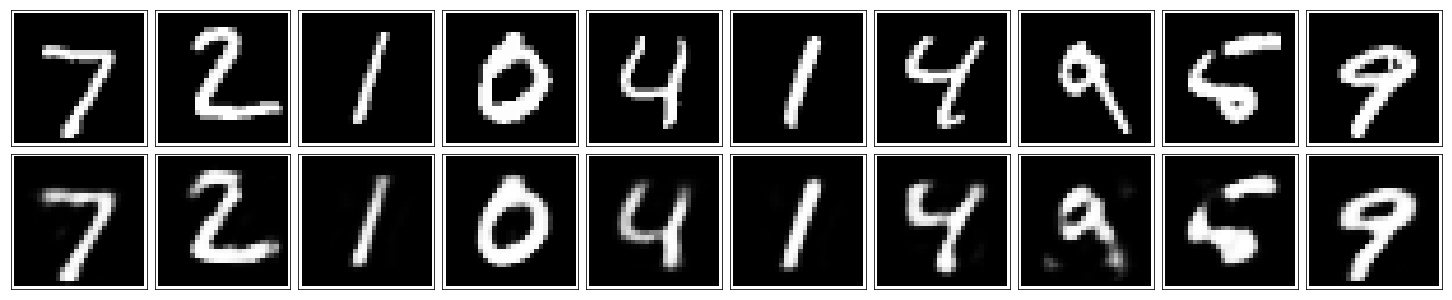

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [9]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.